# Ordinary Least Square using Singular Value Decomposition      

## Ordinary Least Square
The goal of using OLS is to estimated the relationship between a dependent variable (response) and one or more independent variables (predictor)and also to find the linear relationship that best fits the observer data.

Here $\beta$ is the intercep and $\beta 1$ and $\beta 2$ are the coefficient for $x$ and $x^2$, respectively, and \epsilon represents the error term.

$$
y= \beta _0 + \beta _1x +\beta _2x^2 + \epsilon
$$

The coefficients are estimated using the least square method, which minimize the sum of square residuals (difference between observed and predicted values). The formula below: 
$$ 
\beta = (X^T X)^{-1} X^T y
$$
where $X$ is the design matrix and $y$ is the vector of observed values

## Singular Value Decomposition
Singular Value Decomposition is a mathematic technique in linear algebra that facotrs a matrix into three other matrices. It is powerful tool for analyzing of matrices and has wide range of application

Given any $m*n$ matrix $A$, SVD decomposed it intro three matrices: 
$$ 
A = U\sum V^T
$$

where:

$U$: An mxm orthogonal matrix whose columns are the left singular vector of A

$\sum$: An mxn diagonal matrix with non-negative real numbers on the diagonal, called singular values

$V$: An nxn orthogonal matrix whose columns are the singular vectors of $A$, and $V^T$ is the tranpose of $V$


In [2]:
import numpy as np 

# Set the random seed for reproducibility
np.random.seed(10)

# Generate data with added noise 
x = np.linspace(0,5,1000)
y = 3*x**2 + 5*x - 4 + np.random.normal(0,3,len(x))

# Create a design matrix with columns [x^2, x, 1]
matrix = np.vstack([x**2, x, np.ones(len(x))]).T

# Perform Singular Value Decomposition (SVD) on the design matrix
U, d, VT = np.linalg.svd(matrix, full_matrices = False)

# Inverse of singular values
d_inv = np.diag(1/d)
y_col = y[:, np.newaxis]

# Compute coefficients
beta = VT.T @ d_inv @ U.T @ y_col
beta = beta.flatten()

print(beta)


[ 3.00184393  4.87022044 -3.7345948 ]


[-0.08601457  9.70707182 39.80575357]
Intercept: 39.80575357295505, Linear coefficient: 9.707071824716863, Quadratic coefficient: -0.0860145701135771


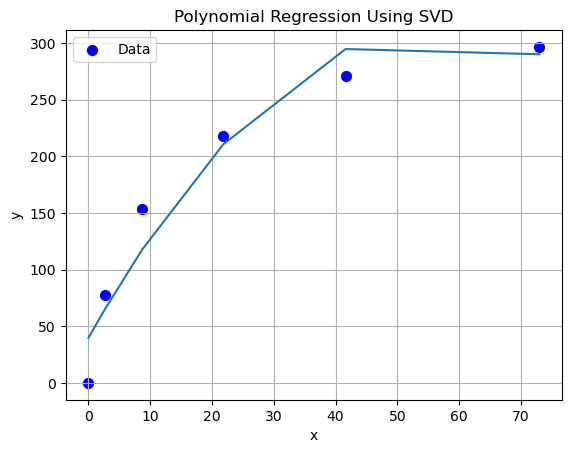

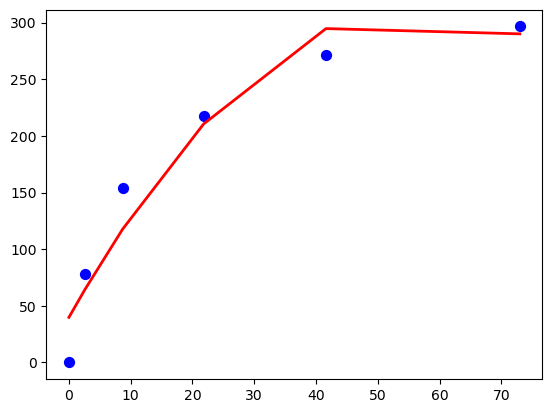

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

# Real data 
x = np.array([0, 2.6,8.7,21.8,41.6,72.97])
y = np.array([0, 77.92, 153.9, 217.9, 271.1, 296.64])

X = np.vstack([x**2, x, np.ones(len(x))]).T

# Compute SVD of X
U, d, VT = np.linalg.svd(X, full_matrices = False)

# Compute the pseudo-inverse using SVD components
d_inv = np.diag(1 / d)
X_pseudo_inv = VT.T @ d_inv @ U.T

# Compute the coefficients
y_col = y[:, np.newaxis]
beta = X_pseudo_inv @ y_col
beta = beta.flatten()
print(beta)
intercept = beta[2]
linear = beta[1]
quadratic = beta[0]
print(f"Intercept: {intercept}, Linear coefficient: {linear}, Quadratic coefficient: {quadratic}")
y_pred = X @ beta

Y = beta[0]*x**2 + beta[1] * x + beta[2] 
# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, color='blue', s=50, label='Data')
# plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted Polynomial')
plt.plot(x,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Polynomial Regression Using SVD')
plt.show()

plt.scatter(x, y, color='blue', s=50, label='Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted Polynomial')

In [ ]:
from FoKL import FoKLRoutines